### STEP 1: Import the data

#### Read in the data:
The input file is a tab-delimited text file (i.e. each column is separated by <-TAB->).  
So here we use the `read.csv()` function and include `sep = '\t'` to make R read it in correctly as tab-delimited.  
The `header = TRUE` bit keeps the column names as headers - we'll kinda need these.  


In [1]:
test = read.csv('data/test_gwas.txt', sep = '\t', header = TRUE)

### STEP 2: Explore the data

#### Lets have a look at the data:
Use `head()` to eyeball the first 6 rows of our data:

In [2]:
head(test)

,chrom,bp,pvalue,gene
,<chr>,<int>,<dbl>,<chr>
1,1,2025837,0.9142,GENE1
2,1,2528866,0.5928,GENE1
3,1,2878321,0.7542,GENE1
4,1,3192870,0.1324,GENE1
5,1,3292731,0.5687,GENE1
6,1,3576288,0.6959,GENE1


Now use `names()` to see the names of each column:

In [3]:
names(test)

[1] "chrom"  "bp"     "pvalue" "gene"

How big is our dataframe? `dim()` gives the dimensions in two numbers:  
*(The first is number of rows, second is columns)*

In [4]:
dim(test)

[1] 21751     4

#### What is it we have?

We have a dataframe of SNPs (single nucleotide polymorphism, pronounced "snip") from GWAS analysis.  
Each row is data representing a SNP  
So, 21,751 SNPs in total!  
  
The 4 columns are:  
"chrom", "bp", "pvalue", and "gene"

"chrom": chromosome the SNP is located on.  
"bp": base pair position at which the SNP occurs on the chromosome.  
"pvalue": significance of the GWAS association for the SNP.  
"gene": the gene the SNP is located in on the chromosome.  
  
We are specifically interested in the significance of the GWAS per SNP, so lets quickly `plot()` the *pvalues*:

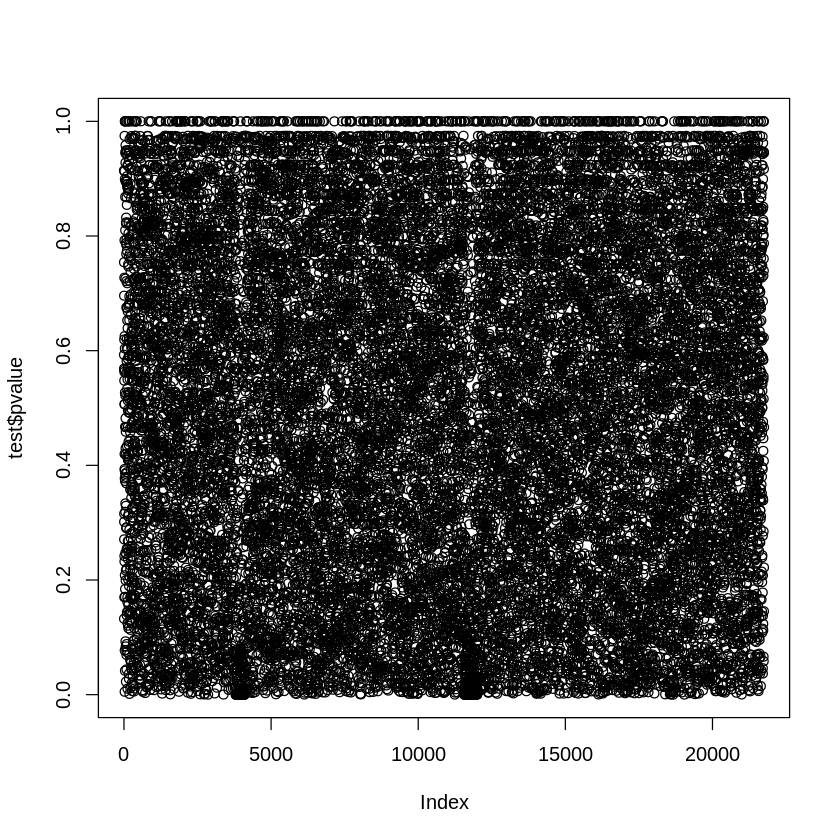

In [5]:
plot(test$pvalue)

This makes no sense at all! Now, lets look at it properly...  
  
When dealing with GWAS data we take the -log10 of the *pvalue*.  \
This highlights the stronger distinctions in the association.  
There is a standardised value of -log10(5e-8) (~7.3) for the threshold.  
The log transformed *pvalue* must exceed before it is considered "true".  
This means that significance is only considered with a raw *pvalue* <= 0.00000005!!!  

So let's `plot()` the -log10 pvalues and add in a dashed line at y =  -log10(5e-8) using `abline()`:

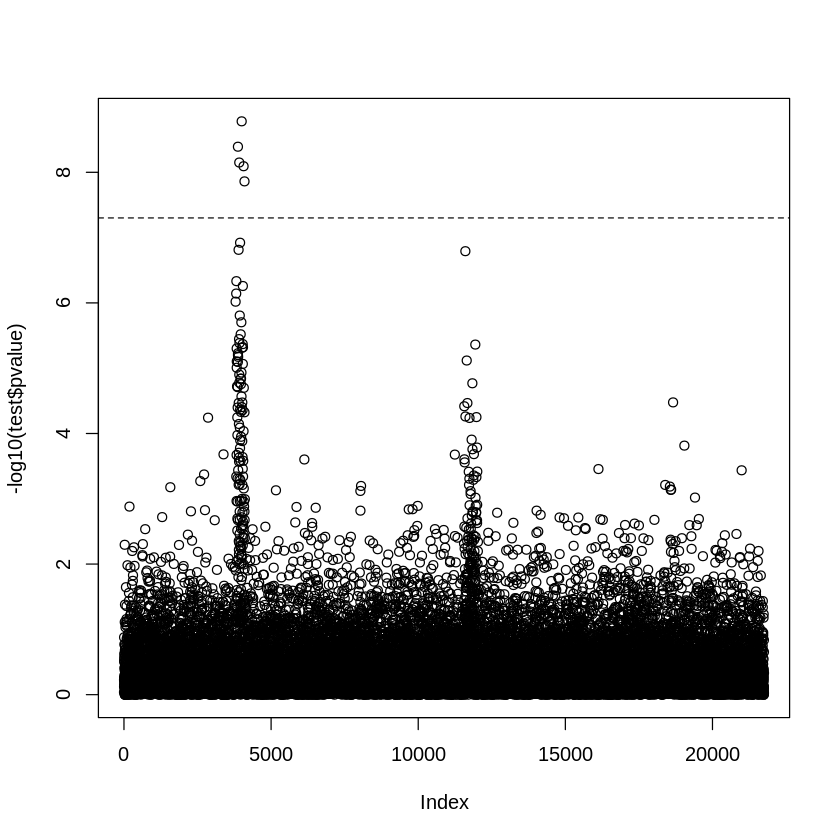

In [6]:
plot(-log10(test$pvalue))

abline(h = -log10(5e-8), lty = 2)

Oh, now we have something!  \
But what does this mean? How can we make this make sense? Which chromosome and which gene is important?  
So many questions (no really, I'm Sure... riveting isn't it)

### STEP 3: Make the data make sense
R is a very powerful analytic tool. It, like many others, has the ability to create functions.  
Functions are small "programs" that execute a set of commands.  
Here we will use some premade functions that will perform the heavy lifting for this practical.

**!DO NOT PANIC!** This is as simple as point-and-click. Once clicked, forever in memory. We're good to go :)
  \
  \
  We are going to import the code for these functions from the "function" directory that forms part of this practical:

In [7]:
source('functions/man.plot.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'functions/man.plot.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


The functions are now loaded into the R session and will persist until you close the notebook  
#### The functions and how to use them:
The first function, `man.data.frame()`, converts the data into a useful form.  
It gives us additional values:  
* transformed *pvalue* i.e -log10()
* relative basepair position on the chromosome (*shows the closeness of the SNPs*)

Use `man.data.frame()` to transform the data:  
*NB: we need to assign an R object, here called "man_data", to the output of the function*

In [46]:
man_data = man.data.frame(test)

In [47]:
head(man_data)

,chrom,relative_bp,transformed_pvalue,gene
,<chr>,<dbl>,<dbl>,<chr>
1,1,1,0.03895878,GENE1
2,1,503029,0.22709181,GENE1
3,1,349455,0.12251347,GENE1
4,1,314549,0.87811201,GENE1
5,1,99861,0.24511677,GENE1
6,1,283557,0.15745316,GENE1


The second function, `man.plot()`, plots the data clearly.  
It importantly plots the figure but also:  
* seperates, labels and colours the chromosomes (*to better dinstinguish them*)
* adds on the threshold line at -log10(5e-8)
* creates a new dataframe (*needed later*)

Use `man.plot()` to plot the data:  
*NB: again, we need to assign an R object, here called "man_plot", to be the output of the function*

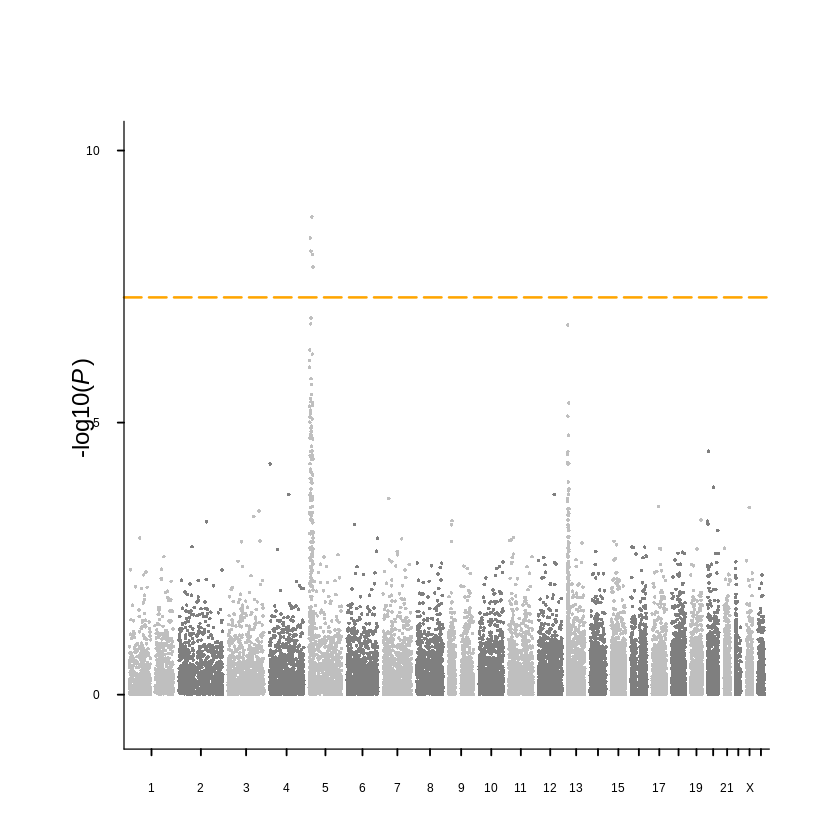

In [48]:
man_plot = man.plot(man_data)

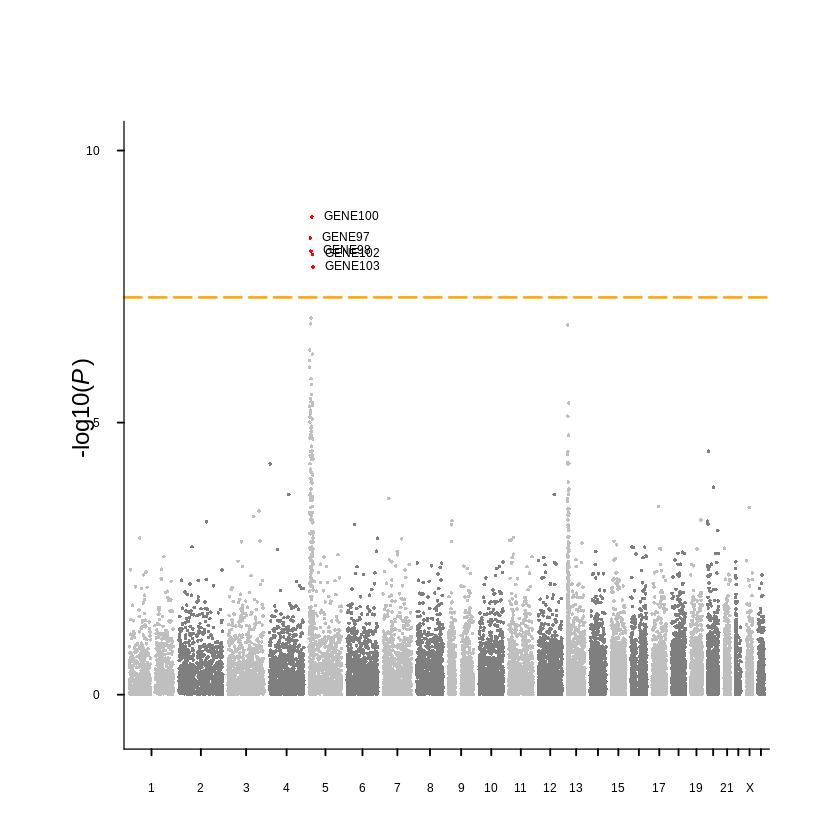

In [59]:
man_plot = man.plot(man_data)

man.highlight(man_plot)

ralf = man.label(man_plot)

In [66]:
a = order(ralf$transformed_pvalue, decreasing = T)
a
#diff(ralf$relative_bp)

[1] 8.780415 8.391795 8.149721 8.092857 7.860751

In [57]:

man_plot$points

[1]   29494115   29997144   30346599   30661148   30761009   31044566
    [7]   31404333   31496508   31658037   31927355   31944409   32146591
   [13]   32399517   32561254   32566115   32737916   32933534   33071437
   [19]   33375937   33974566   34086109   34328636   34544716   34862538
   [25]   35080254   35249000   35988992   36033453   36131578   36322328
   [31]   36666059   36844639   37829757   38004209   38477582   38675201
   [37]   39289898   39314010   41304334   41677759   41708500   41713641
   [43]   41791442   41796266   41836760   41848604   41916121   42172784
   [49]   42411752   42481227   42843346   43926683   45257827   45538434
   [55]   45600328   45891274   46048238   46102276   46412617   47038780
   [61]   47138113   47146862   47513901   47832165   47843626   47860673
   [67]   47916767   47937003   47968981   48078489   48167108   48298296
   [73]   48716769   48764895   49200372   49478726   49649381   49895490
   [79]   50026116   50087551   51270334   51752853   51807124   52089944
   [85]   52093595   52105554   52678761   53823421   54270209   56164930
   [91]   56204985   56505447   57089601   57526395   57607206   57611180
   [97]   57614679   57672425   57706252   57751546   57877178   57953791
  [103]   58102681   58161683   58489154   58603089   58910668   59175208
  [109]   59184362   60783917   61008155   61162743   61181893   61232560
  [115]   61506834   61581332   61932199   61971121   62027940   62268922
  [121]   62892828   64255676   64268305   64632285   64994605   65128610
  [127]   66632851   66768949   66832006   67296334   68000096   68239767
  [133]   68417331   68943051   69055793   69817402   70139442   70150207
  [139]   70154560   70332822   70696148   70874827   71312883   71371429
  [145]   72272251   72357800   73144353   73168713   73648173   74047568
  [151]   74943094   75061057   75163843   76366499   76423241   76463393
  [157]   76623372   76725487   78369643   79164480   80702130   80772144
  [163]   80920744   81204347   81281536   81529886   83010657   83144534
  [169]   83287271   83562655   83812097   84060038   84192481   84479394
  [175]   84881975   85099323   85220532   85395099   85586104   85664488
  [181]   85767282   85970074   86060093   86190853   86378076   86841555
  [187]   86943553   87064573   87114553   87696663   88378552   88918568
  [193]   89105629   89846786   89983831   90339101   90507586   90873457
  [199]   91401438   91782399   92309629   92430470   92860594   92918799
  [205]   93024097   93297983   93412594   93549517   94232565   94365602
  [211]   94387683   94479754   94732130   94818821   94841981   95186050
  [217]   95541479   95646990   95828749   95831059   95873323   95900958
  [223]   96030757   96186896   96291568   97027052   97119975   97329064
  [229]   97685951   97818257   98162039   98169577   98785705   98937806
  [235]   99179786   99963450  100189406  100888253  100959542  101056497
  [241]  101101409  101121590  101141709  101464677  101577311  101626546
  [247]  101956443  102381165  102851277  102940637  103144382  103149039
  [253]  103206068  103206280  103220655  103281983  103732494  103754685
  [259]  103909536  103922088  104089657  104220844  104490669  104927512
  [265]  105007713  105759298  106310040  106451783  106594954  106632924
  [271]  106760293  106894299  107345028  107394008  107491809  107524554
  [277]  107683341  107903764  108234716  108611810  108756375  109011635
  [283]  109235710  109246717  109626782  109702496  110018751  110304578
  [289]  110431407  110479950  110591222  111067576  111350136  111466165
  [295]  111518731  111659991  112218639  112354095  112458088  112764741
  [301]  112828881  113096488  113182269  113474183  113586352  113616849
  [307]  113766670  113793135  113794535  113902140  114222122  114720295
  [313]  114951743  115413826  115417401  115633730  115987462  116117315
  [319]  116182100  116758931  116831948  117308219  117484637  117563250
  [325] 

In [40]:
height = read.csv('data/height_gwas.txt', sep = '\t', header = T)

In [41]:
man_data = man.data.frame(height)

In [42]:
png('plots/height.png', height = 600, width = 2000, units = 'px', pointsize = 30)

par(mar = c(3, 1.5, 0, 1))

man_plot = man.plot(man_data, threshold = 8.46)
man.highlight(man_plot, threshold = 8.46)
man.label(man_plot)

dev.off()

,chrom,relative_bp,transformed_pvalue,gene,cols,points
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
70240,3,2202,7.872049,ADAMTS17,grey75,293695927
276171,10,1021,25.929213,,grey50,928433407
89757,3,520,14.052384,LCORL,grey75,344063051
110682,4,157,7.437699,LOC102153538,grey50,426470644
110726,4,79,7.415112,LOC111095620,grey50,426485082
110879,4,300,8.670152,CCDC152,grey50,426544142
111036,4,698,13.124012,GHR,grey50,426622253
196172,7,1022,7.389629,SMAD2,grey75,702717341
270020,10,11678,7.610823,GDF11,grey50,920238973


png 
  2